# **Aufgabe 1: Ueberblick** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **Visualierung der Inhalte der CSV-Datei**

In [2]:
data = pd.read_csv('./data/miete23.csv', sep = ',')
data.head()

nmqm  wfl.gekappt      bj                 WL  Zentral  Gebtyp.23  \
0  12.04          109  1939.0  durchschnittliche        0  Wohnblock   
1  19.51          123  2003.5  durchschnittliche        1    anderer   
2  15.42          120  1983.0  durchschnittliche        1    anderer   
3  13.06           68  1972.0  durchschnittliche        1    anderer   
4  15.63           64  1957.5  durchschnittliche        1  Wohnblock   

   Modern.Boden  Boden.Fak  kue.score.23  bad.score23  Fussboden.Heizung  
0             0  wedernoch             0            1                  0  
1             0        gut             0            2                  0  
2             0        gut             0            1                  0  
3             0        gut             0            0                  0  
4             1        gut             0            1                  0

## **Erkenntnisse**

### **1. Diagramm: Tabelle zum Ueberblick**
Die Untersuchung vom Mietspiegel ist recht aufwendig. Es ist erstaunlich, von wie vielen Faktoren die Nettomiete pro m^2 abhaengt. So wird neben klassichen Faktoren, 
wie Baujahr, Lage auch die Anzahl an Geraeten im Bad und Kueche beruecksichtigt, um deren Einfluss auf die Nettomiete pro m^2 zu ermitteln. 

### **2. Diagramm: Normalverteilungskurve**
Das zweite Diagramm ist ziemlich informativ. Enstprechend den Berechnungen liegt der Erwartungswert fuer die zu erwartende Nettomiete pro m^2 bei ca. 14,71€. Waehrend die 
meisten anderen Werte zwischen 10€ und 20€ liegen

### **3. Diagramm: Korrelations-Matrix**
In diesem Diagramm wird untersucht, ob zwischen den einzelnen Groeßen untereinander ein Zusammenhang besteht. So korrelieren das Baujahr der Wohnung, bzw. 
vom Gebauede und der verwendeten Fußbodenheizung moderat. Bei den meisten anderen Groeßen wandert die Korrelation zwischen 0,00 und 0,30 oder zwischen 0,00 und -0,50. 
Beeindruckend dabei ist aber, dass die Anzahl an elektronischen Geraeten in Kueche und Bad einen moderaten Einfluss auf 
die Nettomiete pro m^2 hat. Zudem hat die Lage der Wohnung praktisch keinen Einfluss auf die anderen Eigenschaften.

### **4. Diagramm: Verteilungskurven fuer die einzelenen Eigenschaften in Abhaengigkeit anderer Eigenschaften**
Aehnlich wie das dritte Diagramm bloß mehr im Detail.

### **5. Diagramm: Einfluss der Eigenschaft fuer Random Forest**
Stark vereinfacht ausgedrueckt haben die Wohnflaeche und Baujahr den groeßten Einfluss auf die Nettomiete pro m^2.

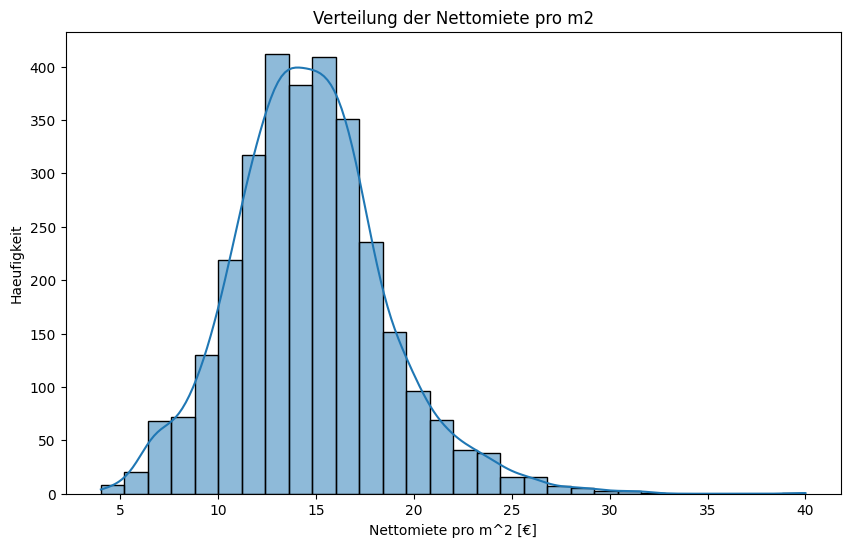

C:\Users\ztson\AppData\Local\Temp\ipykernel_13276\511607243.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


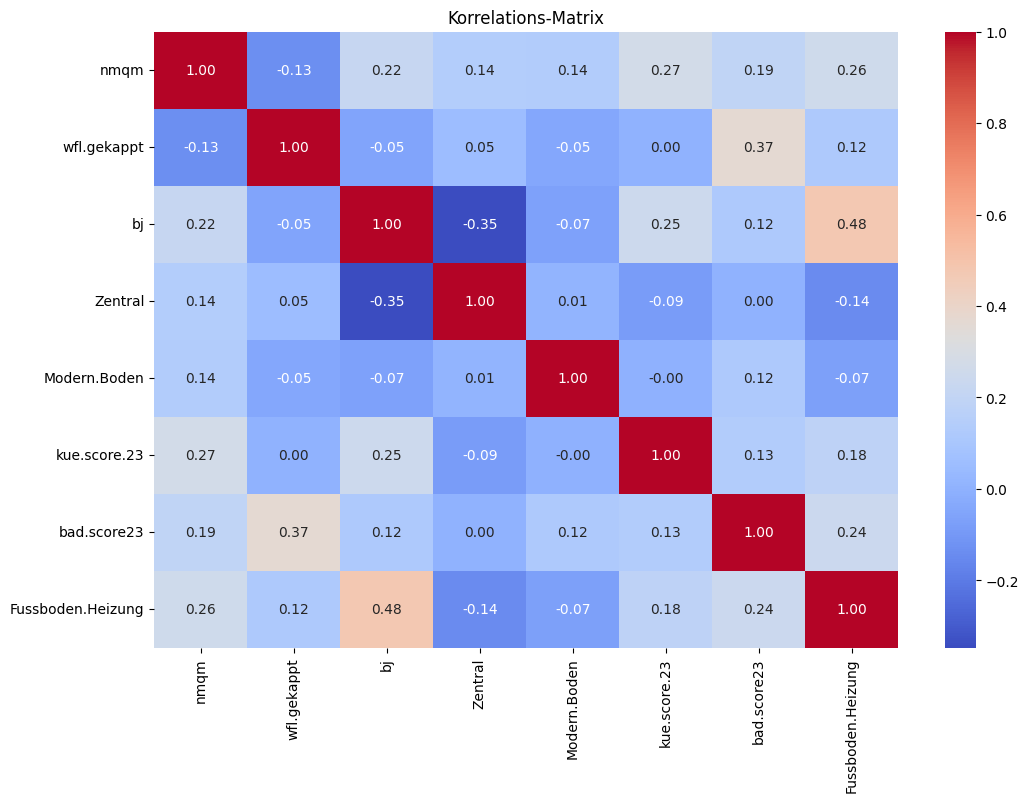

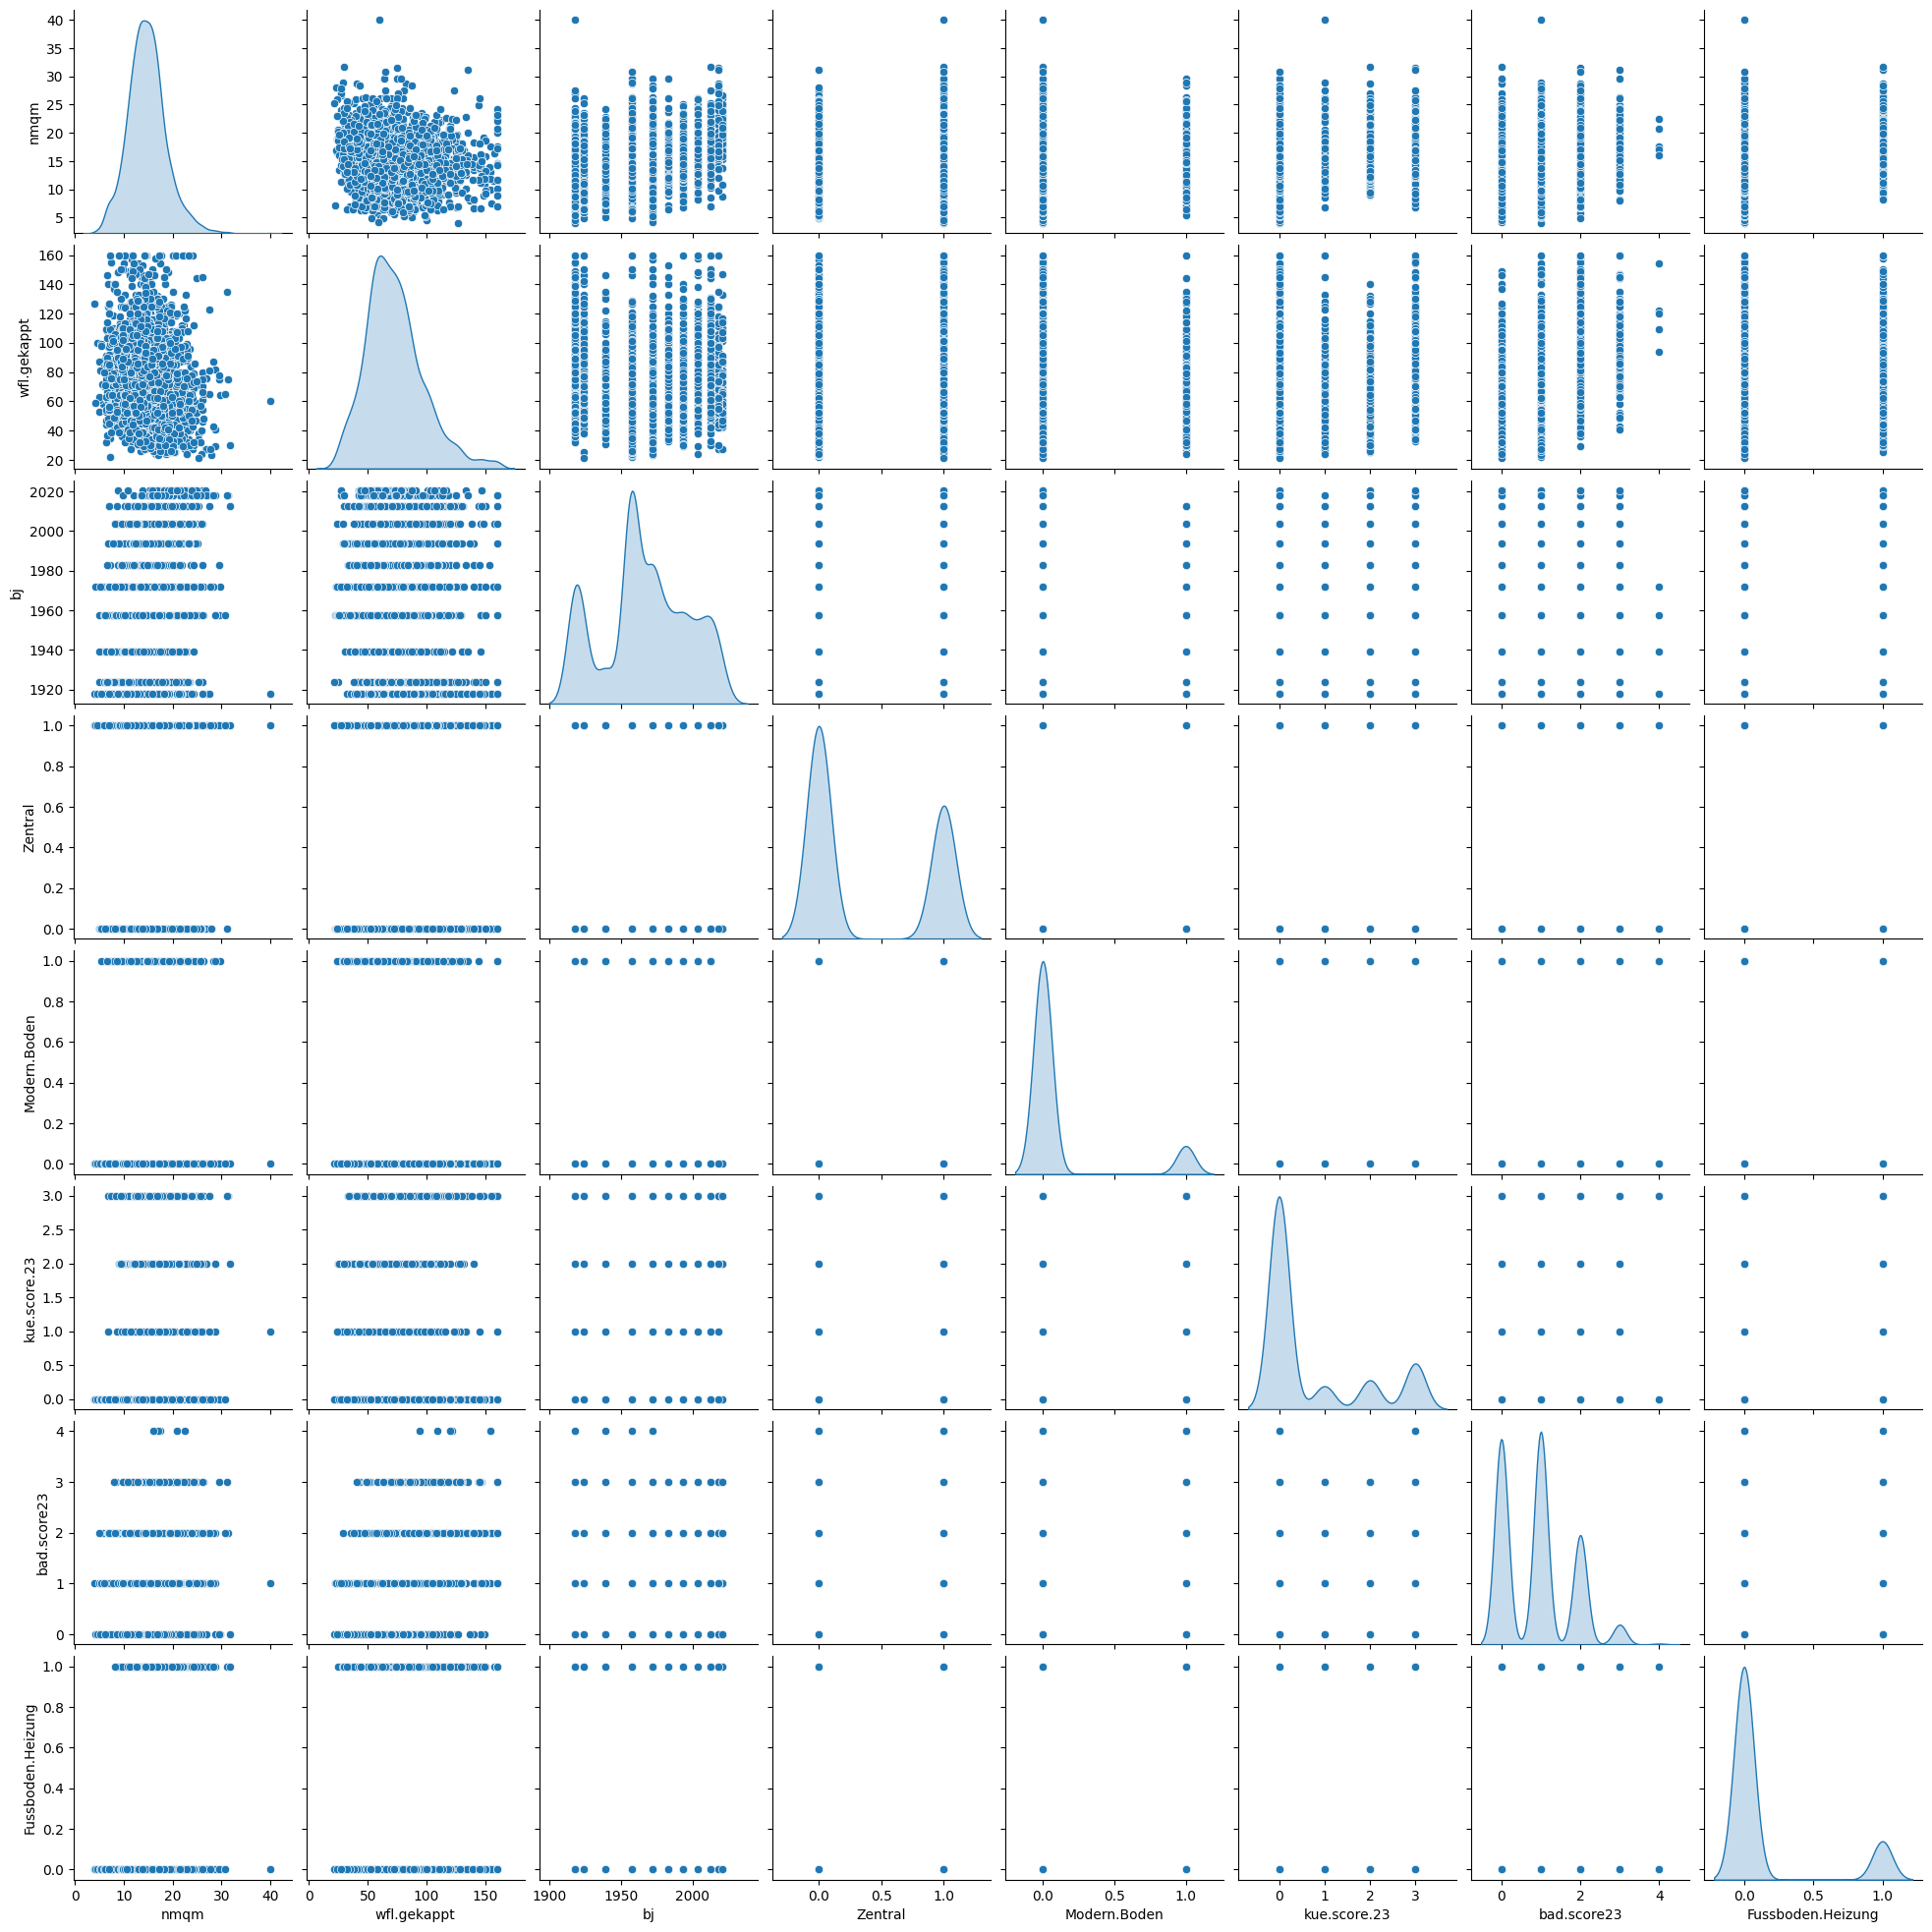

In [3]:
# 1. Diagramm: Wahrscheinlichkeitsverteilung fuer die Nettomiete pro m^2
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='nmqm', kde=True, bins=30)
plt.title('Verteilung der Nettomiete pro m2')
plt.xlabel('Nettomiete pro m^2 [€]')
plt.ylabel('Haeufigkeit')
plt.show()

# 2. Diagramm: Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korrelations-Matrix')
plt.show()

# 3. Diagramm: Visualierung der Beziehungen innerhalb der Eigenschaften
sns.pairplot(data, diag_kind='kde')
plt.show()

# **2. Aufgabe: Modellierung**

## **Warum diese Modelle für den Mietspiegel geeignet sind**

### **Lineare Regression**
Die Einfachheit und Interpretierbarkeit machen sie zu einem guten Ausgangspunkt für die Analyse des Mietspiegels. Sie ermoeglicht es, schnell Einblicke in 
die Haupteinflussfaktoren zu gewinnen und diese zu quantifizieren.

### **Random Forest**
Diese Methode bietet die Moeglichkeit, komplexere Zusammenhänge zu modellieren, die moeglicherweise in den Mietdaten vorhanden sind, und liefert robuste 
Vorhersagen selbst bei variierenden Datenqualitäten.

## **Tabellarischer Vergleich**

| Modell            | Vorteile                                                                                                    | Nachteile                                                                                           |
|------------------|---------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Linear Regression| - Einfach zu implementieren<br>- Effizient<br>- Ergebnisse sind interpretierbar          | - Erwartet einen linearen Zusammenhang<br>- Sensibel gegenueber Schwankungen<br>- Schwierigkeiten mit komplexen Zusammenhaengen    |
| Random Forest    | - Umgang mit nicht-linearen Zusammenhaengen funktioniert<br>- Robust gegenueber Schwankungen<br>- Reduktion von Ueberanpassung durch Mitteln der Werte    | - Erhoehte Komplexitaet und schwierig zu interpretieren<br>- Hoher Rechenaufwand<br>- Kann Instabilitaeten erzeugen |


## **Training der Modelle Lineare Regression und Random Forest**

In [4]:
# Vorbereiten der Daten
X = data.drop(columns=['nmqm'])
y = data['nmqm']

# Anlegen von Dummies fuer die einzelnen Variablen
X = pd.get_dummies(X, drop_first=True)

# Splitten der daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisieren der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trainieren vom Modell Lineare Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Trainieren vom Modell Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Untersuchung der beiden Modelle
def evaluate_model(true, predictions, model_name):
    mse = mean_squared_error(true, predictions)
    r2 = r2_score(true, predictions)
    print(f'{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}')

evaluate_model(y_test, lr_predictions, 'Lineare Regression')
evaluate_model(y_test, rf_predictions, 'Random Forest')

Lineare Regression - MSE: 11.93, R2: 0.29
Random Forest - MSE: 13.39, R2: 0.20


## **Auswahl des Modells**

### **Ohne Interpretierbarkeit**
Random Forest, da es die Realitaet besser abbildet als die Lineare Regression, welche immer einen linearen Zusammenhang erwartet. In der Realitaet sind nicht alle 
Zusammenhaenge linear darstellbar. Zudem ist Random Forest resistenter gegenueber Ueberanpassung als die Lineare Regression, da die Lineare Regression sehr stark 
versucht sich an die Daten anzupassen. Des Weiteren kann der Mietspiegel in der Zukunft um noch weitere Aspekte erweitert werden. Folglich ist die Lineare Regression 
anfaelliger fuer Stoerungen, wodurch das Modell an Qualitaet verliert.

### **Mit Interpretierbarkeit**
Lineare Regression, da es verstaendlicher als Random Forest ist, welches komplexer ist und mehr einer Black-Box aehnelt. Zudem hat das Modell Lineare Regression ein 
hoeheres RS2, etwa 0,29, wodurch 29 Prozent aller Varianz der abhaengigen Variablen durch das Modell erklaert werden. Dies ist foerderlicher fuer die Interpretierbarkeit.
Außerdem ist der gemittelte quadratische Fehler, kurz MSE, fuer die Lineare Regression knapp 20 Prozent kleiner als der fuer das Modell Random Forest. Außerdem ist die 
Lineare Regression bei hohen Datenmengen sehr effizient.


## **3. Aufgabe: Interpretation der Ergebnisse**

## **Analyse der einzelnen Eigenschaften in Bezug auf die Nettomiete pro m^2**

## **Interpretation**

Das untenstehende Balkendiagramm veranschaulicht sehr gut, dass die Wohnflaeche, Baujahr, sowie die Bestattung der Kueche sowie Bad einen hohen Einfluss die Nettomiete 
pro m^2 hat. Sonst sind neben der Lage, also Zentralitaet vom Gebauede, die anderen Eigenschaften kaum von Relevanz.

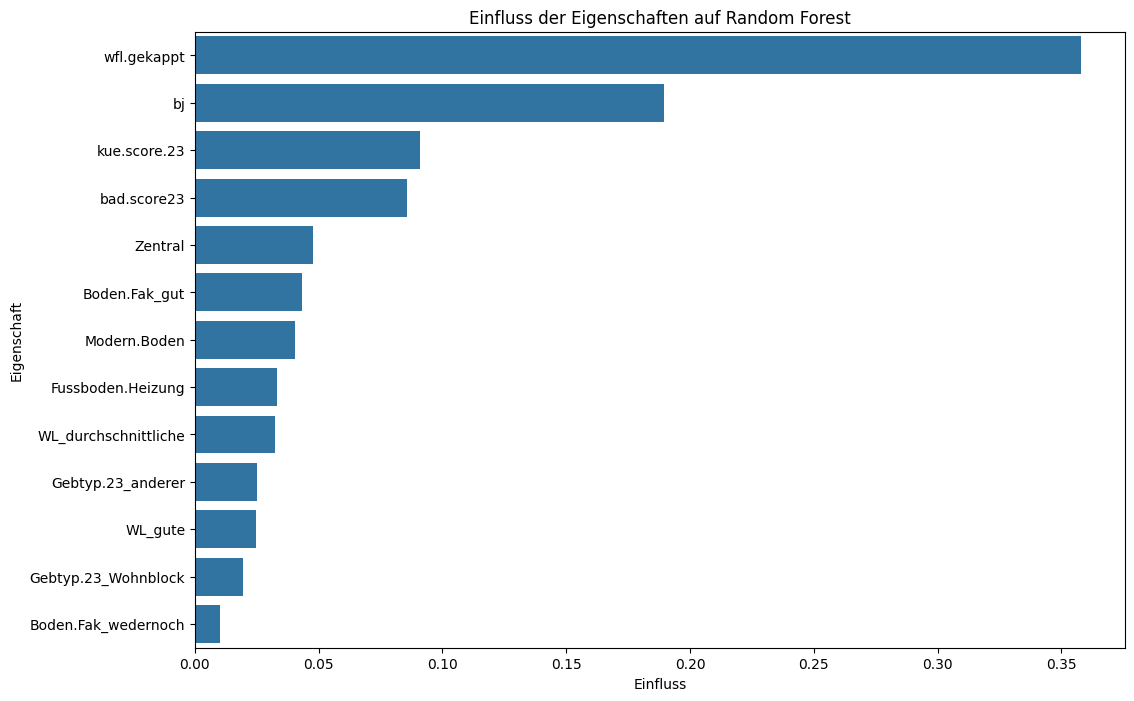

In [5]:
# Deklarieren von Variablen
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Eigenschaft': feature_names, 'Einfluss': importances})
feature_importance_df = feature_importance_df.sort_values(by='Einfluss', ascending=False)

# 5. Diagramm: Erzeugen vom Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Einfluss', y='Eigenschaft', data=feature_importance_df)
plt.title('Einfluss der Eigenschaften auf Random Forest')
plt.show()

## **Moegliche Vorhersage der Nettomiete pro m^2 fuer eine Beispielwohnung**

In [6]:
# Fiktive Werte fuer eine Wohnung in Muenchen
new_data = {
    'wfl.gekappt': 50, 'bj': 1995, 'WL': 'gut', 'Zentral': 1,
    'Gebtyp.23': 'Mehrfamilienhaus', 'Modern.Boden': 1,
    'Boden.Fak': 'Parkett', 'kue.score.23': 2, 'bad.score23': 3, 'Fußboden.Heizung': 1
}
new_df = pd.DataFrame([new_data])
new_df = pd.get_dummies(new_df, drop_first=True)

# Neue Daten an die Trainingsdaten anpassen
new_df = new_df.reindex(columns=X.columns, fill_value=0)

# Standardisieren neuer Daten
new_df = scaler.transform(new_df)

# Vorhersage basiedrend auf Random Forest
predicted_rent = rf_model.predict(new_df)
print(f'Nettomiete pro m2 gemaeß Random Forest: {predicted_rent[0]:.2f} €')

Nettomiete pro m2 gemaeß Random Forest: 20.08 €


## **4. Formalitaeten**

In [7]:
# Aufruf von sinfo()
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.11.1
IPython version      : 8.8.0

pandas    : 1.5.2
seaborn   : 0.13.2
matplotlib: 3.8.2
pyforest  : 1.1.0

